# Example of all algorhitms and comparisson

### imports

In [1]:
import matplotlib.pyplot as plt
import numpy
# read data
from lclPyO3.io.tsplib import read_tsplib
# move functions
from lclPyO3.localsearch.move.tsp_array_swap import TspArraySwap
from lclPyO3.localsearch.move.array_reverse_order import ArrayReverseOrder
from lclPyO3.localsearch.move.multi_neighbourhood import MultiNeighbourhood
# evaluation function
from lclPyO3.evaluation.tsp_evaluation_function import TspEvaluationFunction
# Problem class
from lclPyO3.problem.array_problem import ArrayProblem
# termination functions
from lclPyO3.termination.min_temperature_termination_criterion import MinTemperatureTerminationCriterion
from lclPyO3.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion
# simulated annealing
from lclPyO3.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclPyO3.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclPyO3.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction
# steepest descent
from lclPyO3.localsearch.steepestdescent.steepest_descent import SteepestDescent
# tabu search
from lclPyO3.localsearch.tabusearch.tabu_search import TabuSearch
# variable neighbourhood search
from lclPyO3.localsearch.vns.variable_neighbourhood import VariableNeighbourhood
# plotting
from lclPyO3.plot.plot import plot, iterations_plot,plotRust,iterations_plotRust,plotPythonRust
from lclPyO3.localsearch.tabusearch.sum_diff_state import SumDiffState
from lclPyO3 import lclPyO3 as lclRust

# import data
distance_matrix = numpy.loadtxt("../data/distanceMatrix",dtype=float)
size = distance_matrix.shape[0]

## Simmulated annealing

In [2]:
# python
pMoveTSP = TspArraySwap(size)
pEvalTSP = TspEvaluationFunction(distance_matrix, pMoveTSP)
pProblemArray = ArrayProblem(pEvalTSP, pMoveTSP, size)
pTerminationTemp = MinTemperatureTerminationCriterion(100)
pCool = GeometricCoolingFunction(0.95)
pTemp = CnstIterationsTempFunction(1500)
pSimAnn = SimulatedAnnealing(pProblemArray, pTerminationTemp,
pCool, pTemp,logging=False, benchmarking=True)
pResSimAnn = pSimAnn.run()

# Rust
rMoveTSP = lclRust.MoveType.swap_tsp()
rEvalTSP = lclRust.Evaluation.tsp_from_dist_matrix("../data/distanceMatrix")
rProblemArray = lclRust.Problem.array_problem(rMoveTSP,rEvalTSP)

rTerminationTemp = lclRust.Termination.min_temp(100)
rCool = lclRust.Cooling.geometric_cooling(0.95)
rTemp = lclRust.IterationsPerTemp.cnst_iter_temp(1500)

rSimAnn = lclRust.LocalSearch.simulated_annealing(2000,True,rProblemArray,rTerminationTemp,rCool,rTemp)
rResSimAnn = rSimAnn.run()


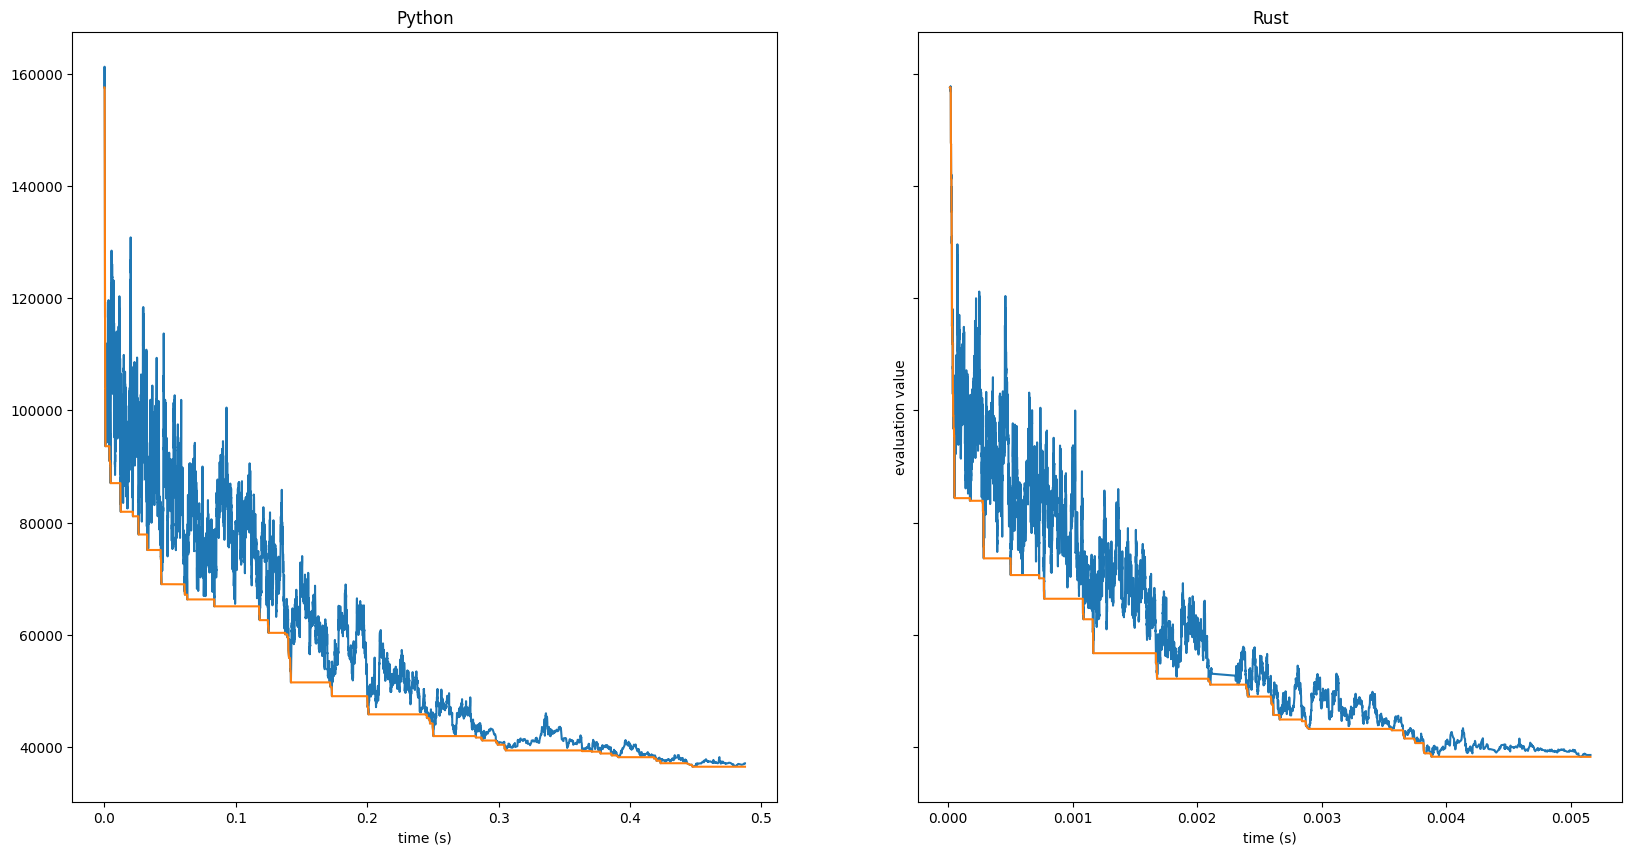

In [3]:
plotPythonRust(pResSimAnn.data,rResSimAnn)

## steepest descent

In [4]:
# python
pMoveTSP2 = TspArraySwap(size)
pEvalTSP2 = TspEvaluationFunction(distance_matrix, pMoveTSP2)
pProblemArray2 = ArrayProblem(pEvalTSP2, pMoveTSP2, size)

pSteepDe = SteepestDescent(pProblemArray2,logging=False, benchmarking=True)
pResSteepDe = pSteepDe.run()

# Rust
rMoveTSP2 = lclRust.MoveType.swap_tsp()
rEvalTSP2 = lclRust.Evaluation.tsp_from_dist_matrix("../data/distanceMatrix")
rProblemArray2 = lclRust.Problem.array_problem(rMoveTSP2,rEvalTSP2)
rTermTrue = lclRust.Termination.always_true()
rSteepDe = lclRust.LocalSearch.steepest_descent(True,rProblemArray2,rTermTrue)
rResSteepDe = rSteepDe.run()

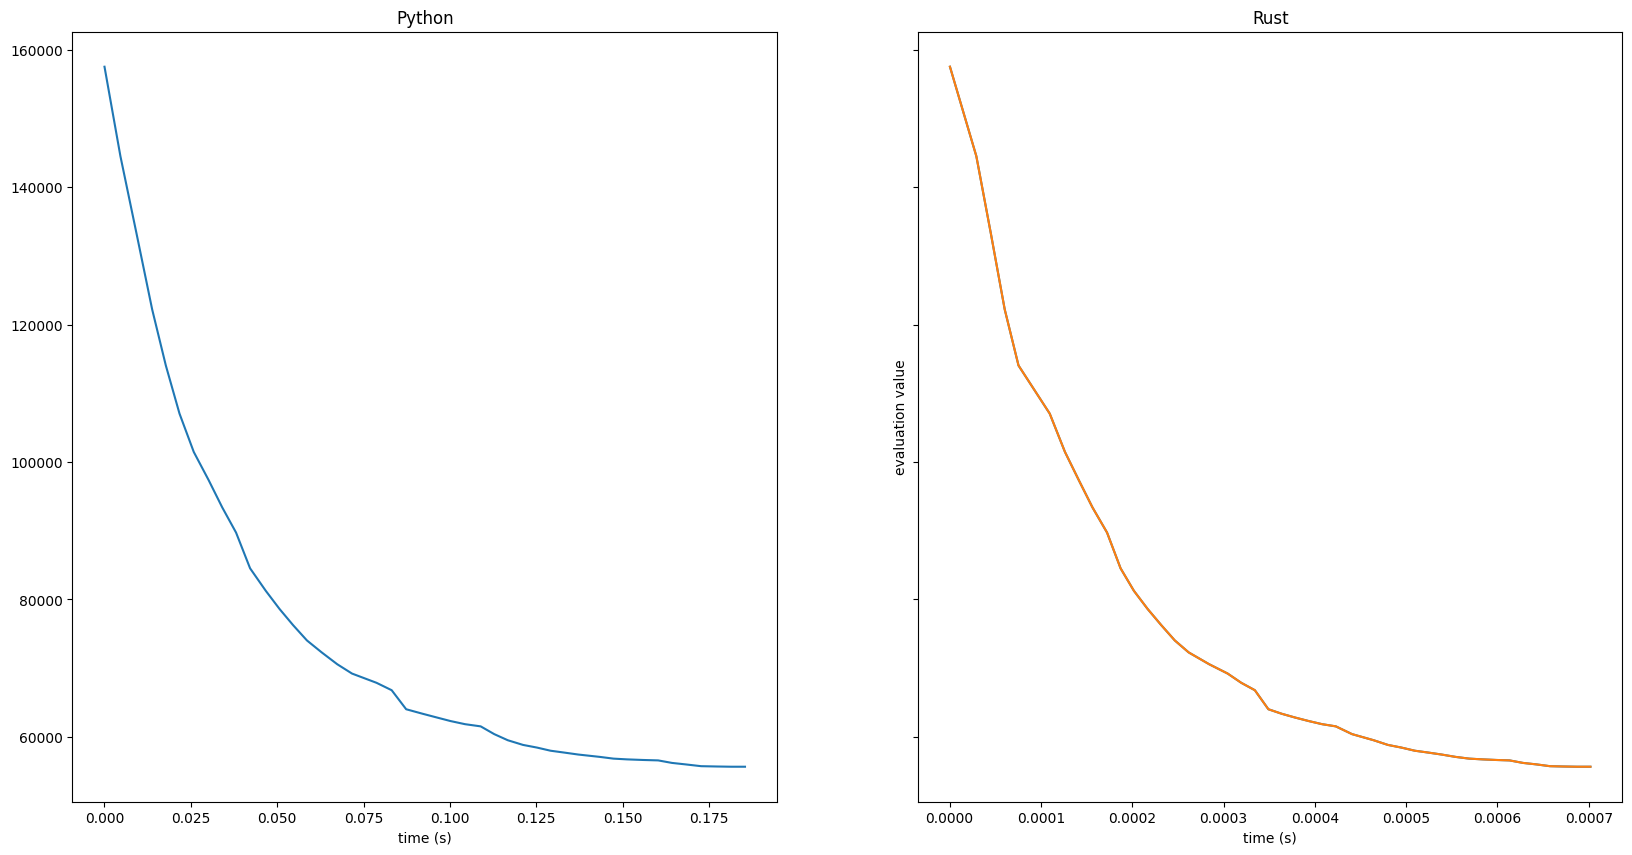

In [5]:
plotPythonRust(pResSteepDe.data,rResSteepDe)

## Tabu Search

In [6]:
# python
pMoveTSP3 = TspArraySwap(size)
pEvalTSP3 = TspEvaluationFunction(distance_matrix, pMoveTSP3)
pProblemArray3 = ArrayProblem(pEvalTSP3, pMoveTSP3, size)
termination3 = MaxSecondsTerminationCriterion(10)
pDiff=SumDiffState()
pTabu = TabuSearch(pProblemArray3,termination3,pDiff,10, logging=False, benchmarking=True)
pResTabu = pTabu.run()

# Rust
rMoveTSP3 = lclRust.MoveType.swap_tsp()
rEvalTSP3 = lclRust.Evaluation.tsp_from_dist_matrix("../data/distanceMatrix")
rProblemArray3 = lclRust.Problem.array_problem(rMoveTSP3,rEvalTSP3)
rTermMax10 = lclRust.Termination.max_sec(10)
rTabu = lclRust.LocalSearch.tabu_search(True,rProblemArray3,rTermMax10,10)
rResTabu = rTabu.run()

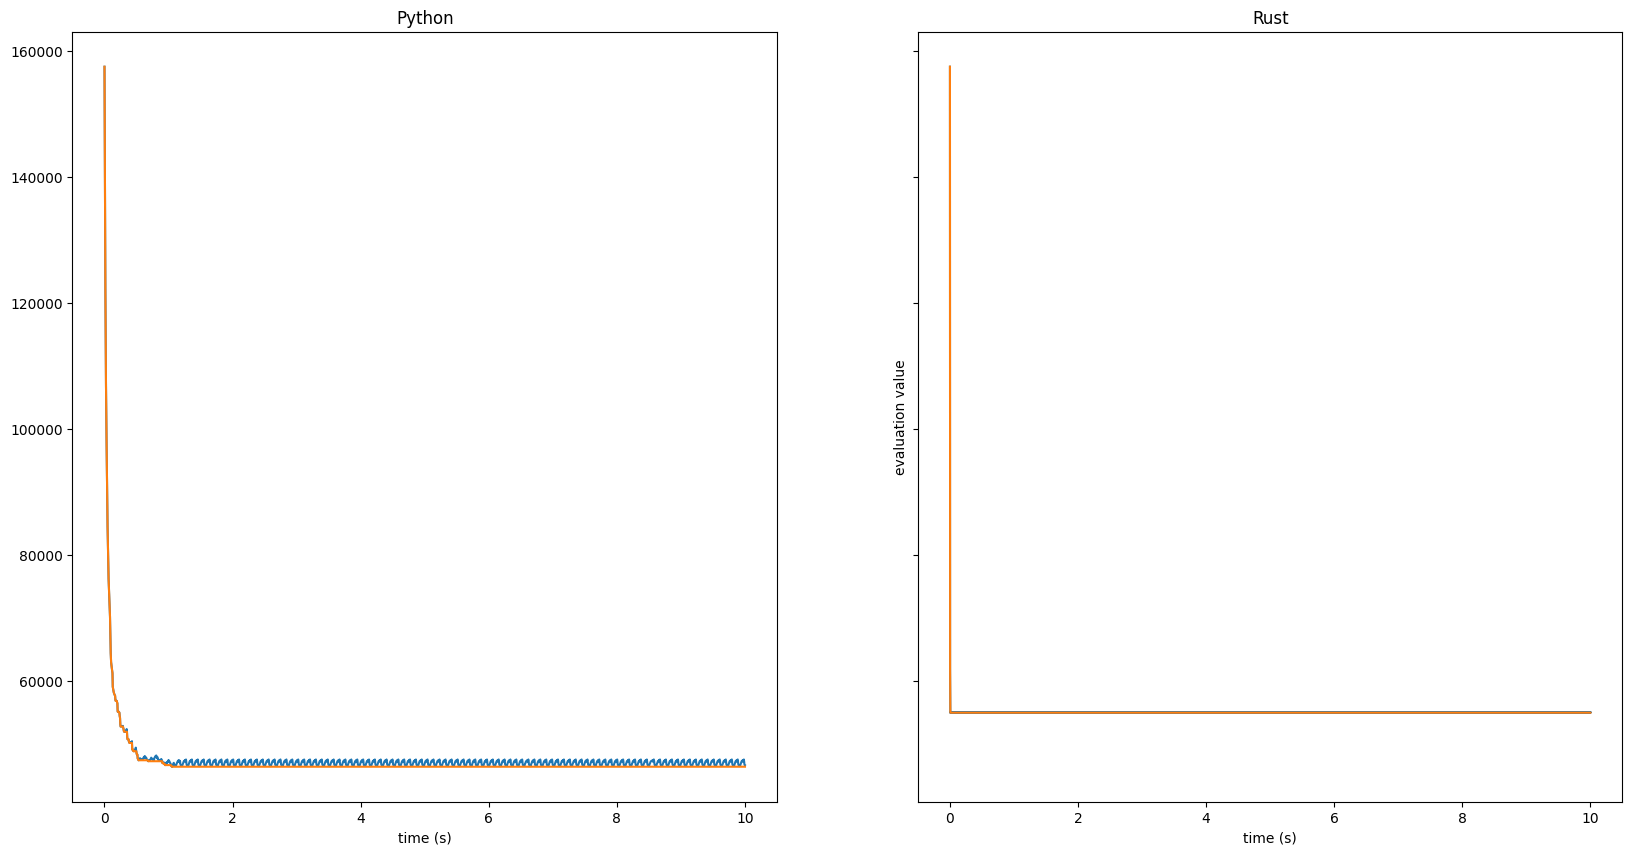

In [7]:
plotPythonRust(pResTabu.data,rResTabu)

## VNS

In [8]:
# python
pMoveTSP4 = TspArraySwap(size)
pMoveReverse4 = ArrayReverseOrder(size)
pMoveVNS4=MultiNeighbourhood([pMoveTSP4,pMoveReverse4])

pEvalTSP4 = TspEvaluationFunction(distance_matrix, pMoveVNS4)
pProblemArray4 = ArrayProblem(pEvalTSP4, pMoveVNS4, size)

pVNS = VariableNeighbourhood(pProblemArray4, logging=False, benchmarking=True)
pResVNS = pVNS.run()

# Rust
rMoveTSP4 = lclRust.MoveType.swap_tsp()
rMoveReverse4 = lclRust.MoveType.reverse()
rMoveVNS4= lclRust.MoveType.multi_neighbor([rMoveTSP4,rMoveReverse4])
rEvalTSP4 = lclRust.Evaluation.tsp_from_dist_matrix("../data/distanceMatrix")
rProblemArray4 = lclRust.Problem.array_problem(rMoveVNS4,rEvalTSP4)

rTermTrue = lclRust.Termination.always_true()
rVNS = lclRust.LocalSearch.vns(True,rProblemArray4,rTermTrue)
rResVNS = rVNS.run()

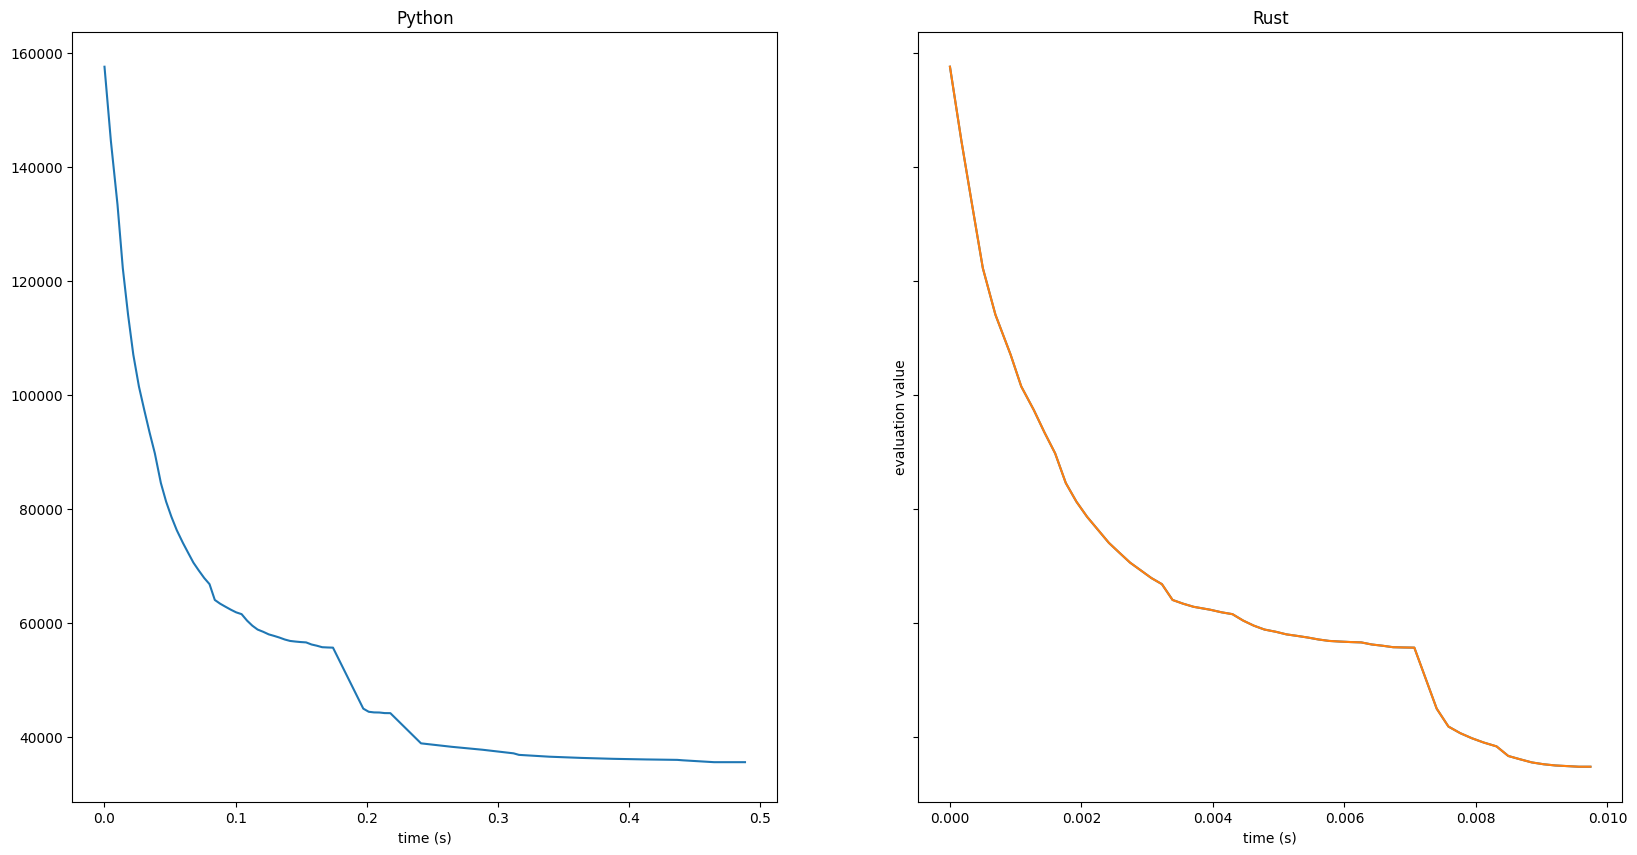

In [9]:
plotPythonRust(pResVNS.data, rResVNS)